In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Data Loading

In [3]:
train = pd.read_csv('/content/drive/Shareddrives/ProgettoHLT/FakeNewsDetection/Data/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/ProgettoHLT/FakeNewsDetection/Data/test.csv')

## Brief Data Analysis

In [4]:
words = [] # Number of total words
for article in train.text:
    for word in article.split():
        words.append(word)
       
unique_words = len(list(set(words))) # Number of unique words 
print('Number of unique words: ', unique_words)

Number of unique words:  123659


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
articles = [text for text in train.text]
articles_len = []

for article in articles:
    articles_len.append(len(nltk.word_tokenize(article)))
    
print('Number of news:', len(articles)) # Number of news

Number of news: 16646


In [7]:
median = round(np.median(articles_len)) # Median 
print('Median length of the news:', median)

Median length of the news: 317


In [8]:
# Adding length column
train['length']= articles_len

### Training Set Distribution

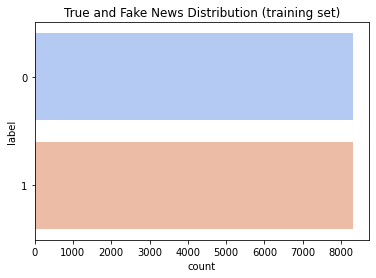

In [9]:
# Training Set Distribution
sns.countplot(y="label", palette="coolwarm", data=train).set_title('True and Fake News Distribution (training set)')
plt.show()

In [10]:
# Number of True News in the Training Set  
print('Number of True News in the Training Set:', len(train.loc[train['label']==0]))  

Number of True News in the Training Set: 8323


In [11]:
# Number of Fake News in the Training Set
print('Number of Fake News in the Training Set:', len(train.loc[train['label']==1]))    

Number of Fake News in the Training Set: 8323


## Tokenization and Padding

In [12]:
# Training Set
X_train = train.text
Y_train = train.label

# Test Set
X_test = test.text
Y_test = test.label

In [13]:
# Sequences of tokenized words
tokenizer = Tokenizer(num_words= unique_words)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
word_index = tokenizer.word_index                          

In [14]:
# Padding
padded_train = pad_sequences(train_sequences, maxlen = median, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = median, padding= 'post', truncating = 'post')                     